### 데이터 시각화 방법
1. DataFrame에 내장되어 있는 plot 함수 이용하기
    - 데이터 전처리 후 빠르고 간단하게 시각화 해볼 수 있다
    - 빠르지만 커스텀 제약이 있다
2. 파이썬 시각화 라이브러리인 matplotlib을 활용하기
    - 시각화 결과물의 커스터마이징에 최적화 되어 있다.
    - 모양이 이쁘지 않고, 복잡하다
3. 모양의 다양성 및 아름다운 결과물을 위해 seaborn같은 외부 라이브러리 활용

#### Pandas plot 함수를 이용한 시각화
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
- https://matplotlib.org/stable/users/explain/colors/colormaps.html
- https://seaborn.pydata.org/examples/index.html

In [3]:
import pandas as pd # pandas라이브러리 불러오기

##### 1. line chart 그리기
- DataFrame.plot(kind='line')

###### 연도별 입사자의 추세 확인해보기

In [4]:
hr_info = pd.read_csv('data/hr-info.csv', encoding='euc-kr')
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [5]:
# HIRE_DATE 컬럼에서 연도를 추출하고
# 각 연도별 사람 수를 세어보자
# hr_info['HIRE_DATE'].str.split('-').str[0]
hire_date_year_cnt = hr_info['HIRE_DATE'].str[:4].value_counts() # 같은 값끼리 개수 세기 : .value_counts()

<Axes: xlabel='HIRE_DATE', ylabel='HIRE_PERSON_COUNT'>

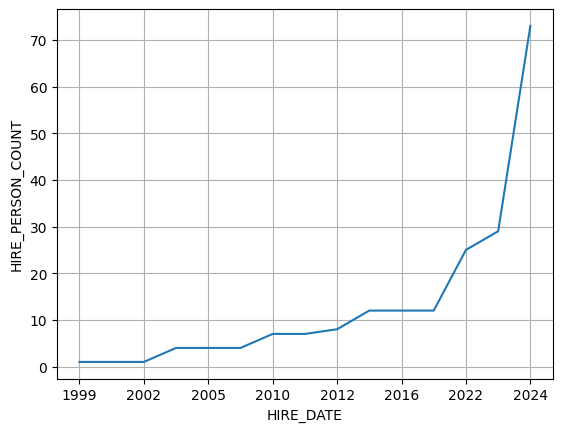

In [6]:
hire_date_year_cnt.sort_index().plot(kind='line', ylabel='HIRE_PERSON_COUNT', grid=True) 

##### 2. bar chart
- DataFrame.plot(kind='bar')

In [7]:
# 한글폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font',family='NanumGothic')

In [8]:
# 폰트정보 확인하기
from matplotlib import font_manager
font_manager.findSystemFonts()


['C:\\Windows\\Fonts\\GOTHIC.TTF',
 'C:\\Users\\chxss\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-ExtraBold.otf',
 'C:\\Windows\\Fonts\\ANTQUAI.TTF',
 'C:\\Windows\\Fonts\\msgothic.ttc',
 'C:\\Windows\\Fonts\\HMKMMAG.TTF',
 'C:\\Windows\\Fonts\\simsun.ttc',
 'C:\\Windows\\Fonts\\CALIFI.TTF',
 'C:\\Windows\\Fonts\\msyhbd.ttc',
 'C:\\Windows\\Fonts\\HMKMAMI.TTF',
 'C:\\Windows\\Fonts\\unispace bd.ttf',
 'C:\\Windows\\Fonts\\corbeli.ttf',
 'C:\\Windows\\Fonts\\CURLZ___.TTF',
 'C:\\Windows\\Fonts\\webdings.ttf',
 'C:\\Windows\\Fonts\\BOD_PSTC.TTF',
 'C:\\Windows\\Fonts\\GARA.TTF',
 'C:\\Windows\\Fonts\\ERASLGHT.TTF',
 'C:\\Windows\\Fonts\\LEELAWDB.TTF',
 'C:\\Windows\\Fonts\\mingliub.ttc',
 'C:\\Windows\\Fonts\\Candaral.ttf',
 'C:\\Windows\\Fonts\\GLSNECB.TTF',
 'C:\\Windows\\Fonts\\FTLTLT.TTF',
 'C:\\Windows\\Fonts\\BOD_BLAI.TTF',
 'C:\\Windows\\Fonts\\times.ttf',
 'C:\\Windows\\Fonts\\HTOWERT.TTF',
 'C:\\Windows\\Fonts\\SCHLBKI.TTF',
 'C:\\Windows\\Fonts\\constanb.ttf',
 'C:\\

<Axes: xlabel='EDU_LEVEL'>

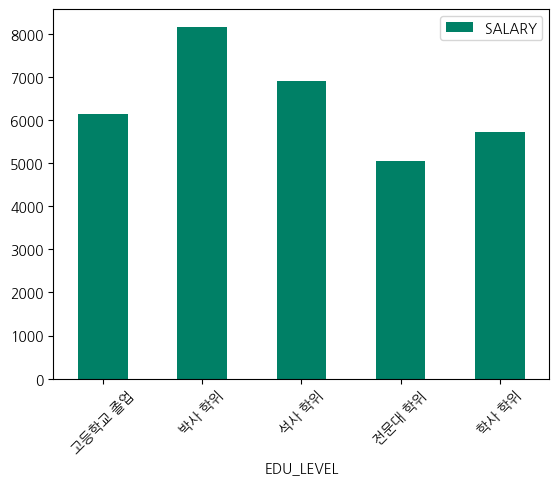

In [9]:
# 학위별 평균연봉을 bar chart로 시각화
hr_info[['SALARY', 'EDU_LEVEL']].groupby('EDU_LEVEL').mean().plot(kind='bar',
                                                                colormap='summer',
                                                                rot=45)

In [10]:
# 학위, 성별을 고려한 평균연봉 시각화
salary_mean = hr_info[['SALARY','EDU_LEVEL','GENDER']].groupby(by=['EDU_LEVEL','GENDER']).mean().round(1)

<Axes: xlabel='EDU_LEVEL,GENDER'>

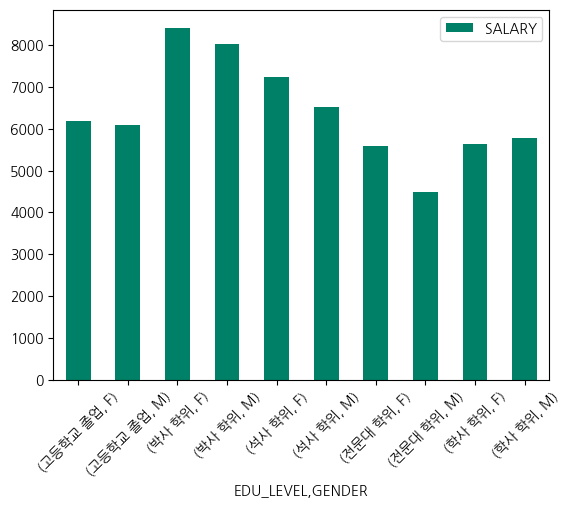

In [11]:
salary_mean.plot(kind='bar',
                    colormap='summer',
                    rot=45)

<Axes: title={'center': '교육수준과 성별에 따른 평균연봉 비교'}, xlabel='평균연봉', ylabel='교육수준'>

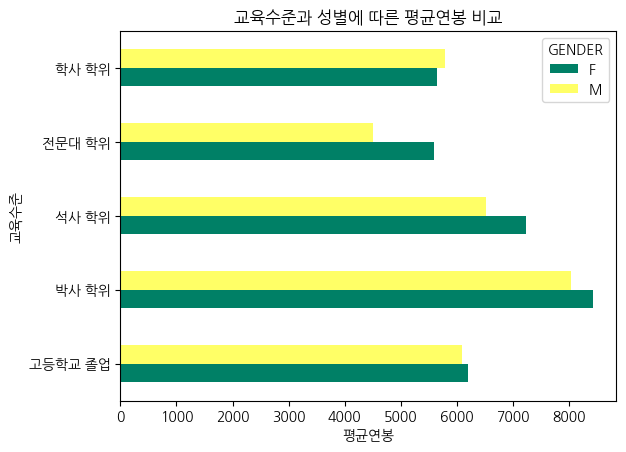

In [12]:
# 시각적인 비교를 위해 같은 교육수준을 한 그룹으로 묶어 남/여가 비교되도록 만들어보자
# 데이터 재구조화 필요
salary_mean_pivot = salary_mean.reset_index().pivot(index='EDU_LEVEL', 
                                                    columns='GENDER',
                                                    values='SALARY')
salary_mean_pivot.plot(kind='barh', colormap='summer', xlabel='평균연봉', ylabel='교육수준',
                        title='교육수준과 성별에 따른 평균연봉 비교')

array([<Axes: title={'center': 'F'}, xlabel='평균연봉', ylabel='교육수준'>,
       <Axes: title={'center': 'M'}, xlabel='평균연봉', ylabel='교육수준'>],
      dtype=object)

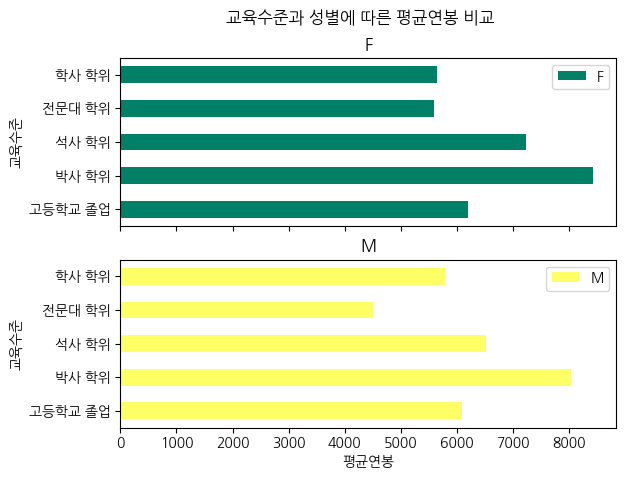

In [13]:
salary_mean_pivot.plot(kind="barh",colormap="summer", xlabel="평균연봉", ylabel="교육수준",
                      title="교육수준과 성별에 따른 평균연봉 비교", subplots=True)

##### 실습) 부서별 평균 연봉 비교하기
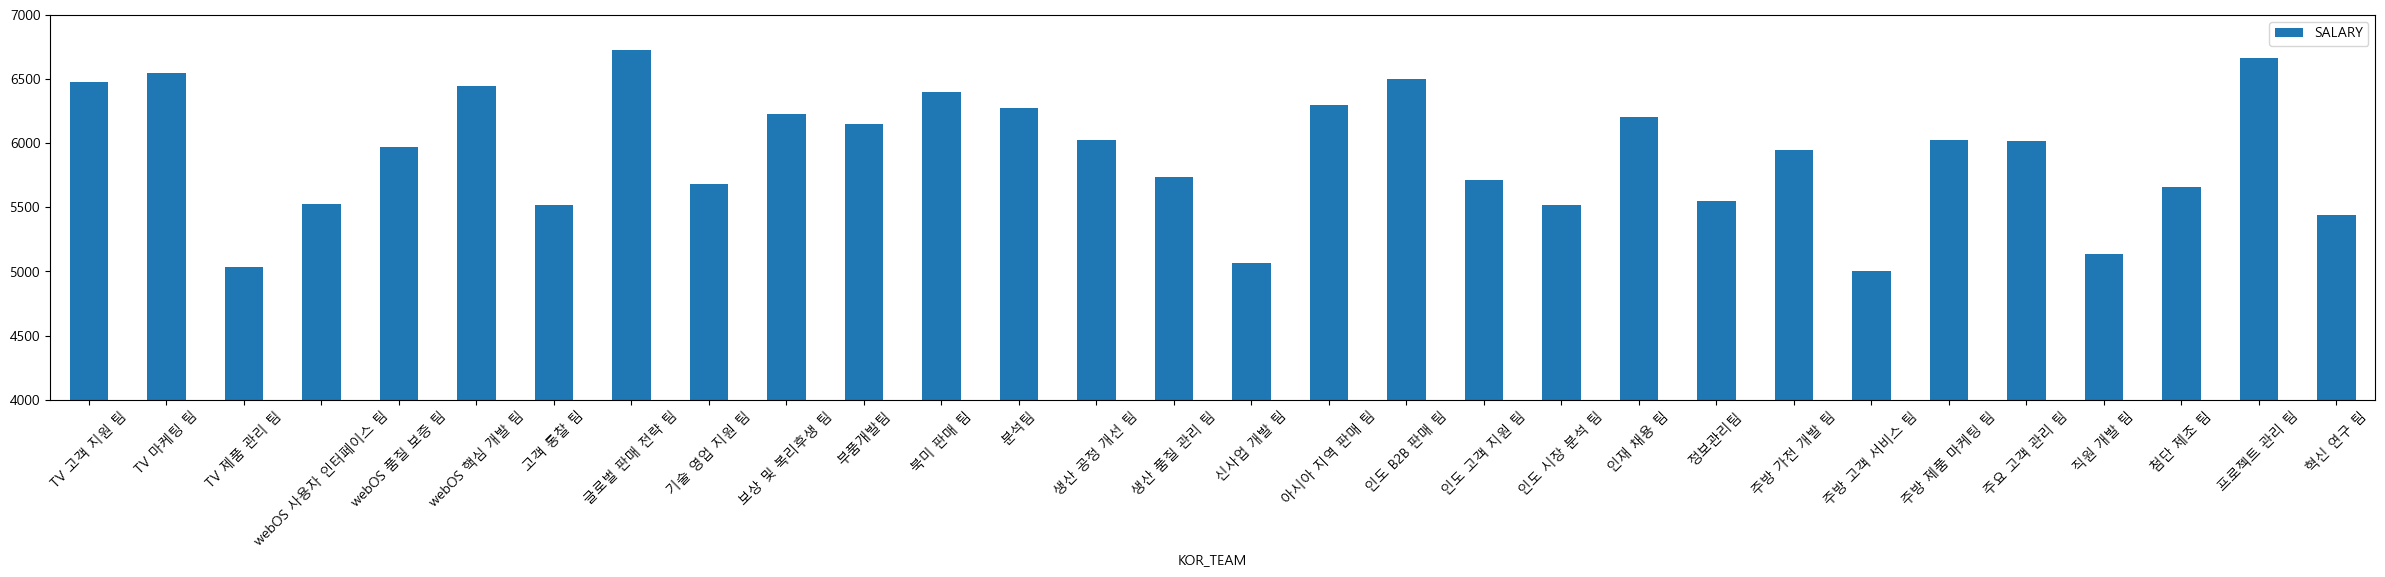
- figsize : 그림의 크기를 조절하는 속성 -> figsize=(0,5) -> 가로, 세로 inch단위
- ylim : y축의 range설정 -> ylim=(4000.7000) -> 축의 최소, 최댓 값 설정

<Axes: title={'center': '팀 별 평균연봉 차트'}, xlabel='팀 이름', ylabel='평균연봉'>

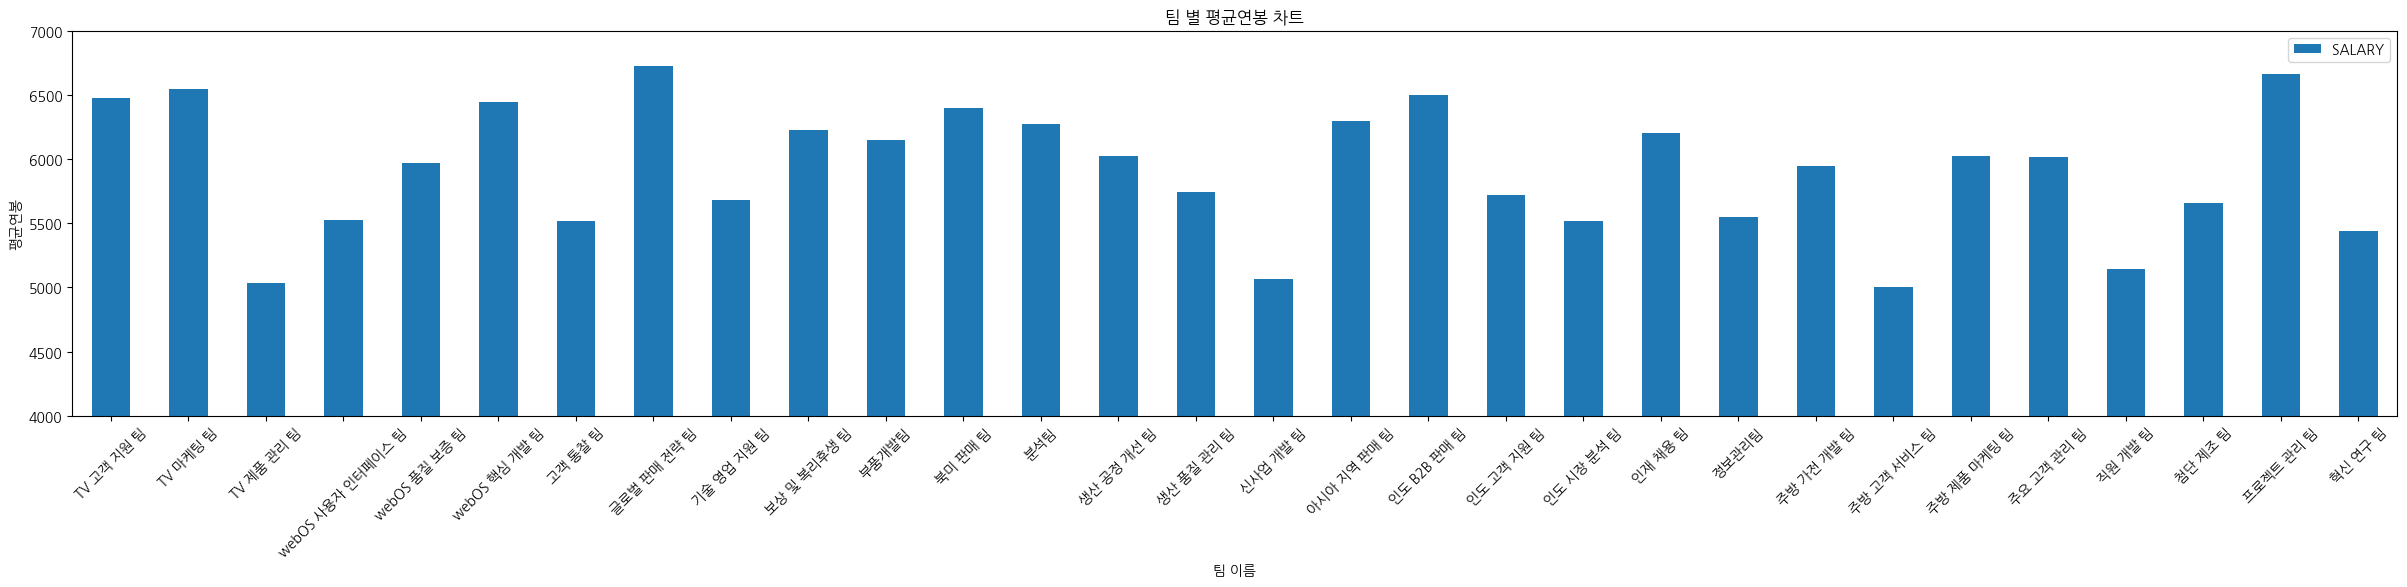

In [14]:
org_info = pd.read_csv('data/org-info.csv', encoding='euc-kr')
# hr_info_sal = hr_info[['ORG_CD','SALARY']] # key값인 org_cd와 평균값 구할 salary 가져오기
# hr_kor = org_info[['ORG_CD','KOR_TEAM']]  # key값인 org_cd와 부서이름 가져오기
# total = pd.merge(hr_info_sal, hr_kor) # 두개 테이블 합치기 org_cd 기준
# total.groupby('KOR_TEAM').mean('SALARY').round(1).plot(kind='bar', figsize=(20,5), ylim=(4000,7000),rot=45)
# 합친테이블 부서별로 그룹.연봉평균.소수점1.그래프(바, 표 크기, 축 값, x축 이름 각도)

org_hr_merge = pd.merge(hr_info, org_info, on='ORG_CD')
team_salary_mean = org_hr_merge[['SALARY','KOR_TEAM']].groupby(by='KOR_TEAM').mean()
team_salary_mean.plot(kind='bar',figsize=(30,5),rot=45, ylim=(4000,7000),
                        xlabel='팀 이름', ylabel='평균연봉',title="팀 별 평균연봉 차트")

#### 3. pie chart
- DataFrame.plot(kind = 'pie)

<Axes: title={'center': '각 본부의 인원비율'}>

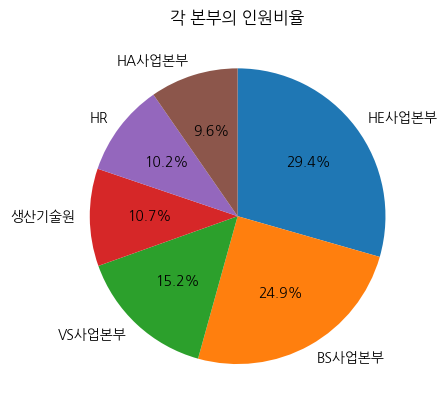

In [15]:
# 각 본부에 속한 인원의 비율을 확인해보자
org_hr_merge['KOR_DIVISION'].value_counts().plot(kind="pie", startangle=90, counterclock=False, 
                                                    autopct='%.1f%%', ylabel='', title="각 본부의 인원비율")

#### 4. 산점도(scatter)
- DataFrame.plot(kind='scatter')

<Axes: xlabel='AGE', ylabel='SALARY'>

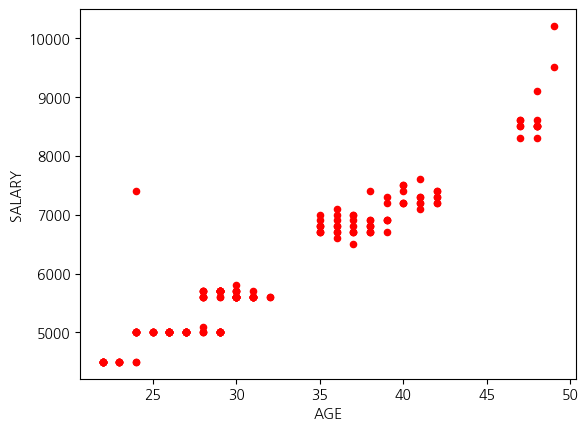

In [16]:
# 나이에 따른 연봉의 분포 확인하기
hr_info.plot(kind='scatter', x='AGE', y='SALARY', color='red')

##### 5.histogram

<Axes: ylabel='Frequency'>

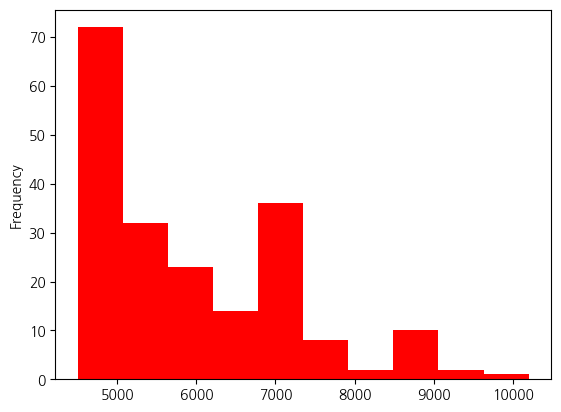

In [17]:
# 연봉의 분포 확인하기
hr_info['SALARY'].plot(kind='hist', color='red')

#### Seaborn을 이용한 시각화
- https://seaborn.pydata.org/examples/index.html
###### 1.히스토그램
- 성별에 따른 연봉 히스토그램

In [18]:
import seaborn as sns

<Axes: xlabel='SALARY', ylabel='Count'>

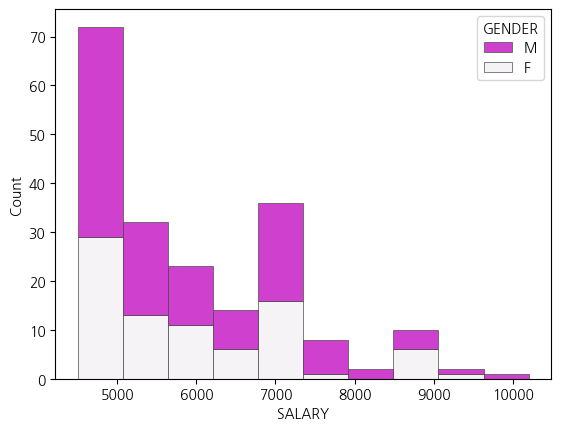

In [19]:
sns.histplot(
    hr_info, # 사용할 데이터 셋
    x='SALARY', # 구간화할 컬럼명
    hue='GENDER', # 하나의 구간에서 다시 분할할 기준이 되는 컬럼(카테고리 형)
    multiple='stack',
    palette='light:m_r',
    edgecolor='.3',
    linewidth=.5
)

##### 2. 버블차트
- 차트내에 많은 데이터를 표기할 수 있다
- 나이와 근속연수에 따른 부서별 연봉비교

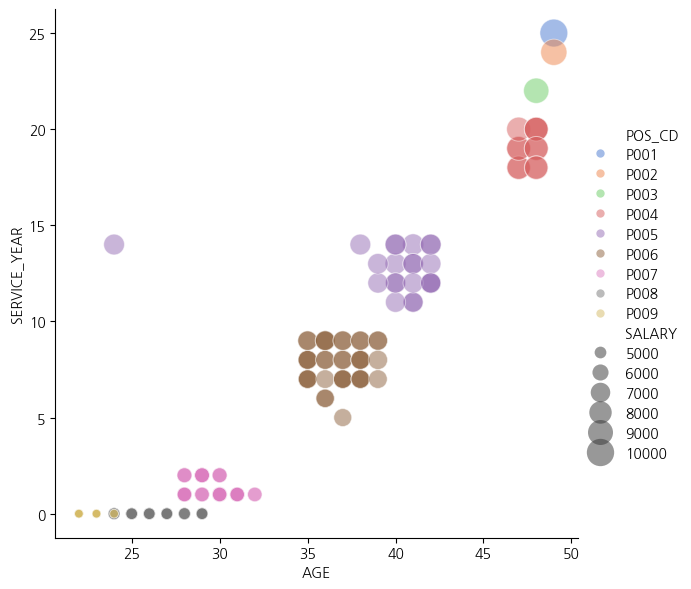

In [20]:
sns.relplot(x="AGE", y="SERVICE_YEAR", 
            hue="POS_CD", 
            size="SALARY",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, 
            data= hr_info # 사용할 데이터 셋
            )

#### 3.heatmap
- 상관계수 시각화

In [21]:
hr_corr = hr_info[["PERFORMANCE_SCORE",'SALARY','AGE','SERVICE_YEAR','TRAINING_HOURS']].corr()
hr_corr

,PERFORMANCE_SCORE,SALARY,AGE,SERVICE_YEAR,TRAINING_HOURS
PERFORMANCE_SCORE,1.000000,0.609152,0.582203,0.492801,0.551200
SALARY,0.609152,1.000000,0.961699,0.970875,0.628931
AGE,0.582203,0.961699,1.000000,0.932563,0.575867
SERVICE_YEAR,0.492801,0.970875,0.932563,1.000000,0.559911
TRAINING_HOURS,0.551200,0.628931,0.575867,0.559911,1.000000


In [22]:
# seaborn 버전변경
# !pip install seaborn==0.13.0

<Axes: >

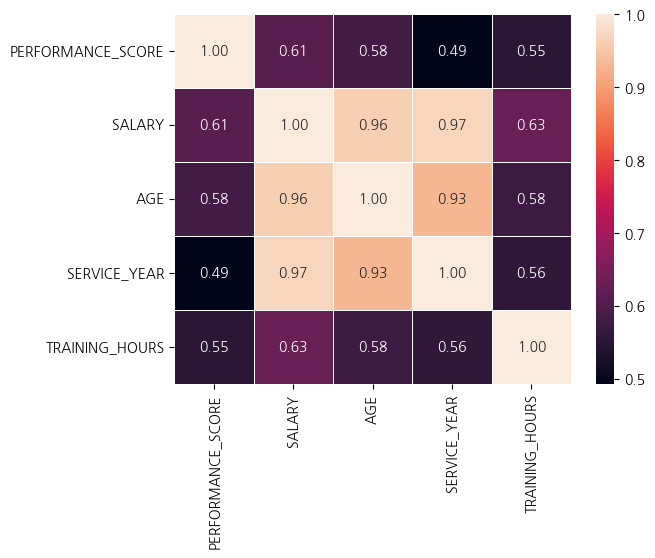

In [23]:
sns.heatmap(hr_corr, # 히트맵으로 그릴 데이터
            annot=True, fmt=".2f", linewidths=.5)